Observation 1: Based on the last 100 tweets fox has had the most negative sentiment overall.
Observation 2: Based on the last 100 tweets CNN has had the most positive sentiment overall.
Observation 3: The "Sentiment Analysis of Media Tweets Plot" shows that several tweets had a compound sentiment score of zero. 

In [5]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [51]:
# Target Users
target_user1 = "@BBCWorld"
target_user2 = "@FoxNews"
target_user3 = "@CBSNews"
target_user4 = "@CNN"
target_user5 = "@Nytimes"
# Variables for holding sentiments and tweet info
compound_list1 = []
positive_list1 = []
negative_list1 = []
neutral_list1 = []
tweet_text1 = []
tweet_date1 = []
compound_list2 = []
positive_list2 = []
negative_list2 = []
neutral_list2 = []
tweet_text2 = []
tweet_date2 = []
compound_list3 = []
positive_list3 = []
negative_list3 = []
neutral_list3 = []
tweet_text3 = []
tweet_date3 = []
compound_list4 = []
positive_list4 = []
negative_list4 = []
neutral_list4 = []
tweet_text4 = []
tweet_date4 = []
compound_list5 = []
positive_list5 = []
negative_list5 = []
neutral_list5 = []
tweet_text5 = []
tweet_date5 = []

# Pull last 100 tweets
for item in tweepy.Cursor(api.user_timeline, id=target_user1).items(100):
    tweet = json.dumps(item._json, indent=3)
    tweet = json.loads(tweet)

    # Parse the tweet to identify its text and date
    text = tweet['text']
    tweet_text1.append(text)
    tweet_date1.append(tweet['created_at'])

    # Analyze the sentiment of the tweet
    compound_list1.append(analyzer.polarity_scores(text)["compound"])
    positive_list1.append(analyzer.polarity_scores(text)["pos"])
    neutral_list1.append(analyzer.polarity_scores(text)["neu"])
    negative_list1.append(analyzer.polarity_scores(text)["neg"])

for item in tweepy.Cursor(api.user_timeline, id=target_user2).items(100):
    tweet = json.dumps(item._json, indent=3)
    tweet = json.loads(tweet)

    # Parse the tweet to identify its text and date
    text = tweet['text']
    tweet_text2.append(text)
    tweet_date2.append(tweet['created_at'])

    # Analyze the sentiment of the tweet
    compound_list2.append(analyzer.polarity_scores(text)["compound"])
    positive_list2.append(analyzer.polarity_scores(text)["pos"])
    neutral_list2.append(analyzer.polarity_scores(text)["neu"])
    negative_list2.append(analyzer.polarity_scores(text)["neg"])
    
for item in tweepy.Cursor(api.user_timeline, id=target_user3).items(100):
    tweet = json.dumps(item._json, indent=3)
    tweet = json.loads(tweet)

    # Parse the tweet to identify its text and date
    text = tweet['text']
    tweet_text3.append(text)
    tweet_date3.append(tweet['created_at'])

    # Analyze the sentiment of the tweet
    compound_list3.append(analyzer.polarity_scores(text)["compound"])
    positive_list3.append(analyzer.polarity_scores(text)["pos"])
    neutral_list3.append(analyzer.polarity_scores(text)["neu"])
    negative_list3.append(analyzer.polarity_scores(text)["neg"])
    
for item in tweepy.Cursor(api.user_timeline, id=target_user4).items(100):
    tweet = json.dumps(item._json, indent=3)
    tweet = json.loads(tweet)

    # Parse the tweet to identify its text and date
    text = tweet['text']
    tweet_text4.append(text)
    tweet_date4.append(tweet['created_at'])

    # Analyze the sentiment of the tweet
    compound_list4.append(analyzer.polarity_scores(text)["compound"])
    positive_list4.append(analyzer.polarity_scores(text)["pos"])
    neutral_list4.append(analyzer.polarity_scores(text)["neu"])
    negative_list4.append(analyzer.polarity_scores(text)["neg"])
    
for item in tweepy.Cursor(api.user_timeline, id=target_user5).items(100):
    tweet = json.dumps(item._json, indent=3)
    tweet = json.loads(tweet)

    # Parse the tweet to identify its text and date
    text = tweet['text']
    tweet_text5.append(text)
    tweet_date5.append(tweet['created_at'])

    # Analyze the sentiment of the tweet
    compound_list5.append(analyzer.polarity_scores(text)["compound"])
    positive_list5.append(analyzer.polarity_scores(text)["pos"])
    neutral_list5.append(analyzer.polarity_scores(text)["neu"])
    negative_list5.append(analyzer.polarity_scores(text)["neg"])

In [52]:
# Create DataFrame
News_Tweet_df = pd.DataFrame({"BBC Tweets":tweet_text1,
                             "BBC Tweet date":tweet_date1,
                             "BBC Compound":compound_list1,
                             "BBC Positive":positive_list1,
                             "BBC Neutral":neutral_list1,
                             "BBC Negative":negative_list1,
                             "Fox Tweets":tweet_text2,
                             "Fox Tweet date":tweet_date2,
                             "Fox Compound":compound_list2,
                             "Fox Positive":positive_list2,
                             "Fox Neutral":neutral_list2,
                             "Fox Negative":negative_list2,
                             "CBS Tweets":tweet_text3,
                             "CBS Tweet date":tweet_date3,
                             "CBS Compound":compound_list3,
                             "CBS Positive":positive_list3,
                             "CBS Neutral":neutral_list3,
                             "CBS Negative":negative_list3,
                             "CNN Tweets":tweet_text4,
                             "CNN Tweet date":tweet_date4,
                             "CNN Compound":compound_list4,
                             "CNN Positive":positive_list4,
                             "CNN Neutral":neutral_list4,
                             "CNN Negative":negative_list4,
                             "NYT Tweets":tweet_text5,
                             "NYT Tweet date":tweet_date5,
                             "NYT Compound":compound_list5,
                             "NYT Positive":positive_list5,
                             "NYT Neutral":neutral_list5,
                             "NYT Negative":negative_list5})
# Save dataframe as a csv
News_Tweet_df.to_csv("News_Tweet_data.csv")

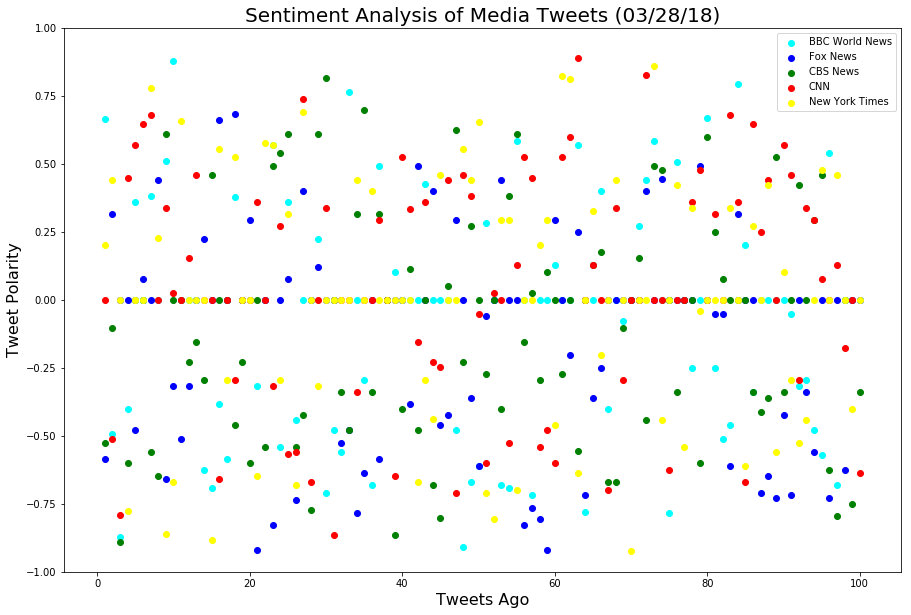

In [68]:
plt.figure(figsize=(15,10))
x_values = list(range(1,101))
bbc_plot = plt.scatter(x_values,News_Tweet_df["BBC Compound"],color="cyan",label = "BBC World News")
fox_plot = plt.scatter(x_values,News_Tweet_df["Fox Compound"],color="blue",label = "Fox News")
cbs_plot = plt.scatter(x_values,News_Tweet_df["CBS Compound"],color="green",label = "CBS News")
cnn_plot = plt.scatter(x_values,News_Tweet_df["CNN Compound"],color="red",label = "CNN")
nyt_plot = plt.scatter(x_values,News_Tweet_df["NYT Compound"],color="yellow",label = "New York Times")
plt.title("Sentiment Analysis of Media Tweets (03/28/18)",fontsize=20)
plt.xlabel("Tweets Ago",fontsize=16)
plt.ylabel("Tweet Polarity",fontsize=16)
plt.ylim(-1,1)
plt.legend(handles=[bbc_plot,fox_plot,cbs_plot,cnn_plot,nyt_plot],loc="best")
plt.savefig("media_sentiment_analysis.png")
plt.show()

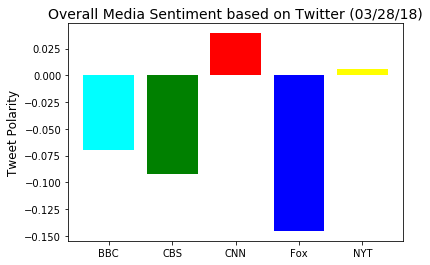

In [67]:
xlabels = ["BBC","CBS","CNN","Fox","NYT"]
xvalues = [News_Tweet_df["BBC Compound"].mean(),News_Tweet_df["CBS Compound"].mean(),News_Tweet_df["CNN Compound"].mean(),News_Tweet_df["Fox Compound"].mean(),News_Tweet_df["NYT Compound"].mean()]
colors=["cyan","green","red","blue","yellow"]
plt.bar(xlabels,xvalues,color=colors)
plt.title("Overall Media Sentiment based on Twitter (03/28/18)",fontsize=14)
plt.ylabel("Tweet Polarity",fontsize=12)
plt.savefig("overall_media_sentiment.png")
plt.show()